In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jun24_ntuple/*.root")

In [3]:
def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x

In [4]:
hists = {}
hists["lambda_hist"] = hist.Hist("Sim Lambda",
                                hist.Bin("e", r"Kinetic Energy [MeV]", 80, 0, 1000)
                            )
hists["lambda_electon_hist"] = hist.Hist("Sim Lambda",      
                                hist.Bin("l", r"$\Lambda$ Kinetic Energy [MeV]", 40, 0, 3000),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["lambda_electon_hist_n1"] = hist.Hist("Sim Lambda",      
                                hist.Bin("l", r"$\Lambda$ Kinetic Energy [MeV]", 40, 0, 3000),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["lambda_electon_hist_n2"] = hist.Hist("Sim Lambda",      
                                hist.Bin("l", r"$\Lambda$ Kinetic Energy [MeV]", 40, 0, 3000),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )
hists["lambda_kaon_hist"] = hist.Hist("Sim Lambda",      
                                hist.Bin("l", r"$\Lambda$ Kinetic Energy [MeV]", 40, 0, 3000),
                                hist.Bin("k", r"$K$ Kinetic Energy [MeV]", 40, 0, 1500),
                            )


In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    sim_kaon = ldmx_events['Sim_Kaon']
    sim_kaon_n = ldmx_events['n']['Sim_Kaon']
    sim_lambda = ldmx_events['Sim_Lambda']
    sim_lambda_dau1 = ldmx_events['Sim_Lambda_dau1']
    sim_lambda_dau2 = ldmx_events['Sim_Lambda_dau2']
    
    lambda0_mass = 1115.683
    kaon_mass = 497.648
    #all lambda are 0 because they are the only light enough
    
    kaone_mask = sim_kaon.e >= 1440
    
    n1_mask = (abs(flat(sim_kaon_n)) == 1)
    n2_mask = (abs(flat(sim_kaon_n)) == 2) 
    
    hists["lambda_hist"].fill(
                         e=flat(sim_lambda.e)-lambda0_mass,
                         )   
    hists["lambda_electon_hist"].fill(
                         l= flat(sim_lambda.e) - lambda0_mass,
                         e= flat(sim_lambda.electrone),
                         )  
  
    hists["lambda_electon_hist_n1"].fill(
                         l= flat(sim_lambda[n1_mask].e) - lambda0_mass,
                         e= flat(sim_lambda[n1_mask].electrone),
                         )  
    hists["lambda_electon_hist_n2"].fill(
                         l= flat(sim_lambda[n2_mask].e) - lambda0_mass,
                         e= flat(sim_lambda[n2_mask].electrone),
                         )  
    
    #hists["lambda_kaon_hist"].fill(
    #                     l= flat(sim_lambda.e) - lambda0_mass,
    #                     k= flat(sim_kaon[kaone_mask].e) - kaon_mass,
    #                     ) 
    #print(flat(sim_lambda.e).shape)
    #print(flat(sim_kaon[kaone_mask].e).shape)
    print(flat(sim_lambda[n1_mask].e).shape)
    print(flat(sim_lambda[n2_mask].e).shape)
    print(flat(sim_lambda.e).shape)

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)


process 1
(162,)
(105,)
(333,)
process 2
(168,)
(125,)
(343,)
process 3
(197,)
(130,)
(387,)
process 4
(179,)
(116,)
(358,)
process 5
(207,)
(116,)
(384,)
process 6
(179,)
(140,)
(389,)
process 7
(203,)
(110,)
(366,)
process 8
(169,)
(139,)
(352,)
process 9
(179,)
(131,)
(368,)
process 10
(167,)
(112,)
(331,)
process 11
(188,)
(127,)
(367,)
process 12
(175,)
(109,)
(352,)
process 13
(151,)
(135,)
(338,)
process 14
(188,)
(110,)
(352,)
process 15
(178,)
(117,)
(356,)
process 16
(196,)
(109,)
(363,)
process 17
(181,)
(130,)
(362,)
process 18
(170,)
(119,)
(357,)
process 19
(201,)
(121,)
(371,)
process 20
(201,)
(115,)
(375,)
process 21
(206,)
(116,)
(385,)
process 22
(196,)
(131,)
(379,)
process 23
(200,)
(98,)
(353,)
process 24
(169,)
(126,)
(342,)
process 25
(191,)
(142,)
(391,)
process 26
(218,)
(126,)
(396,)
process 27
(190,)
(132,)
(388,)
process 28
(197,)
(115,)
(369,)
process 29
(181,)
(99,)
(332,)
process 30
(209,)
(126,)
(398,)
process 31
(168,)
(114,)
(353,)
process 32
(198,)
(

process 253
(209,)
(148,)
(420,)
process 254
(178,)
(114,)
(349,)
process 255
(198,)
(116,)
(361,)
process 256
(184,)
(138,)
(392,)
process 257
(176,)
(98,)
(324,)
process 258
(167,)
(126,)
(338,)
process 259
(216,)
(125,)
(404,)
process 260
(179,)
(132,)
(361,)
process 261
(178,)
(117,)
(356,)
process 262
(171,)
(106,)
(350,)
process 263
(200,)
(140,)
(402,)
process 264
(193,)
(120,)
(379,)
process 265
(183,)
(98,)
(351,)
process 266
(182,)
(141,)
(393,)
process 267
(208,)
(146,)
(433,)
process 268
(178,)
(119,)
(362,)
process 269
(176,)
(133,)
(379,)
process 270
(176,)
(147,)
(375,)
process 271
(174,)
(120,)
(345,)
process 272
(187,)
(128,)
(377,)
process 273
(178,)
(113,)
(357,)
process 274
(182,)
(115,)
(359,)
process 275
(202,)
(123,)
(385,)
process 276
(166,)
(133,)
(346,)
process 277
(194,)
(137,)
(386,)
process 278
(180,)
(125,)
(363,)
process 279
(187,)
(125,)
(362,)
process 280
(205,)
(109,)
(378,)
process 281
(200,)
(145,)
(400,)
process 282
(173,)
(125,)
(354,)
process 283


<Hist (e) instance at 0x13007f880>


(0.0, 1500.0)

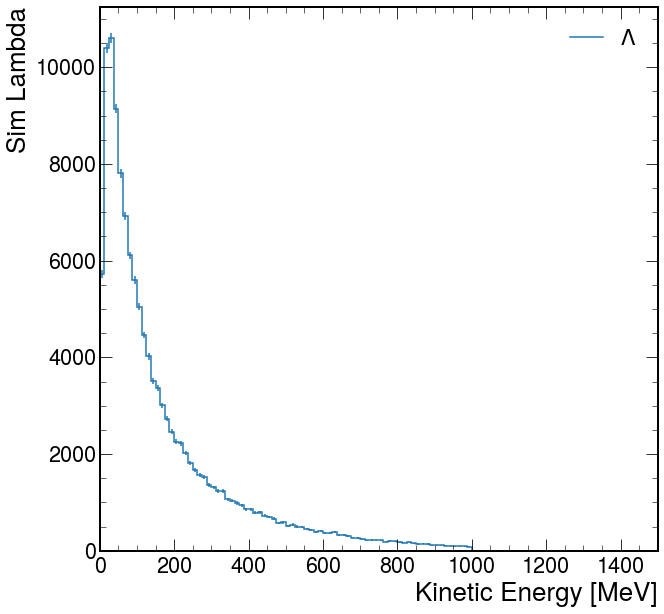

In [7]:
print(hists["lambda_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["lambda_hist"],ax=ax,clear=False);
leg = ax.legend([r'$\Lambda$'])
ax.set_xlim(0, 1500)

<Hist (l,e) instance at 0x13007f7f0>


Text(2500, 50, 'n=2')

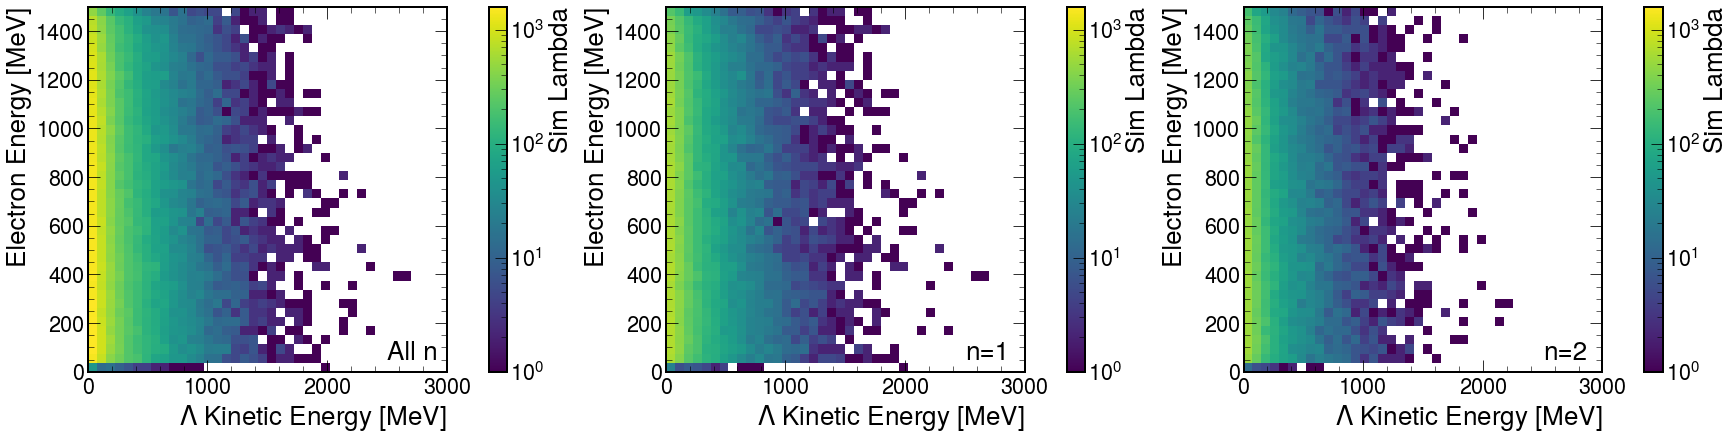

In [8]:
print(hists["lambda_electon_hist"])

fig, ax = plt.subplots(1,3,figsize=(24,6), constrained_layout=True)
hist.plot2d(hists["lambda_electon_hist"], xaxis='l', ax=ax[0],patch_opts=POPTS);
hist.plot2d(hists["lambda_electon_hist_n1"], xaxis='l', ax=ax[1],patch_opts=POPTS);
hist.plot2d(hists["lambda_electon_hist_n2"], xaxis='l', ax=ax[2],patch_opts=POPTS);
ax[0].text(2500, 50,r'All n')
ax[1].text(2500, 50,r'n=1')
ax[2].text(2500, 50,r'n=2')
